In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import os
import warnings
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
#plt.rcParams['font.size'] = 20
#SNR_data_direc = "/home/ad/burkeol/work/KerrEccentricEquatorialFigures/scripts/Results/AAK_Kerr_Comparisons/SNR_data/"
SNR_data_direc = "/data/asantini/emris/eccentric_kerr/KerrEccentricEquatorialFigures/scripts/Results/AAK_Kerr_Comparisons/SNR_data/"
SNR_plot_direc = "/data/asantini/emris/eccentric_kerr/KerrEccentricEquatorialFigures/scripts/Results/AAK_Kerr_Comparisons/plots/SNR_plots/"

file_list = os.listdir()

In [3]:

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]

import pysco 
pysco.plot.default_plotting()
plt.rcParams['font.size'] = 20

In [4]:
import numpy as np
import glob
os.chdir(SNR_data_direc + "M1e6_mu1e1/pure_SNRs/")
# # Step 1: Get all relevant filenames
files = glob.glob("*.npy")  # Adjust path as needed

# # Step 2: Extract and sort spin values
# spin_values = sorted(set(float(f.split("_")[-1].replace(".npy", "")) for f in files))

spin_values = np.concatenate([np.round(np.arange(0,1.0,0.1),3),np.array([0.99,0.998])])
# Step 3: Compute SNR ratios
SNR_ratios_M1e6_mu1e1 = []
ordered_spins = []  # To keep track of the order

for spin in spin_values:
    kerr_file = f"SNR_Kerr_vec_{spin}.npy"
    aak_file = f"SNR_AAK_vec_{spin}.npy"
 
    # Ensure both files exist before proceeding
    # print(file_list)
    if kerr_file in files or aak_file in file_list:

        SNR_Kerr = np.load(kerr_file)
        SNR_AAK = np.load(aak_file)

        # Compute ratio (avoid division by zero)
        # ratio = SNR_Kerr / np.where(SNR_AAK != 0, SNR_AAK, np.nan)
        ratio = SNR_AAK/SNR_Kerr

        SNR_ratios_M1e6_mu1e1.append(ratio[0:])
        ordered_spins.append(spin)

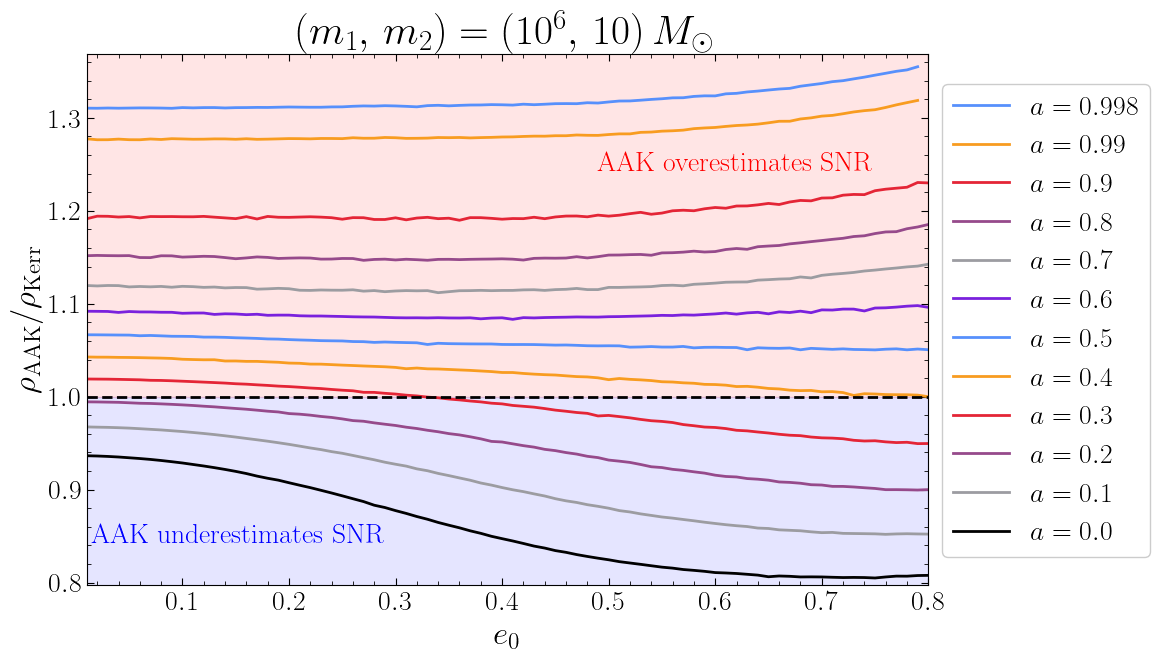

In [5]:
e0_vec = np.arange(0.01,0.81,0.01)
import matplotlib.pyplot as plt
import numpy as np

SNR_ratios = np.asarray(SNR_ratios_M1e6_mu1e1)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Plot all SNR ratios
for j in range(-1 + len(ordered_spins), -1, -1):
    if j == 0:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, c='black', label=rf'$a = {ordered_spins[j]}$', rasterized=True)
    else:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, label=rf'$a = {ordered_spins[j]}$', rasterized=True)
        
    

# Add grid, labels, and title
#ax.grid(True)
ax.set_xlabel(r'$e_0$', fontsize=24)
ax.set_ylabel(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=24)
#ax.set_title(r'AAK vs Kerr Amplitudes', fontsize=30)
ax.set_title(r'$(m_1, \, m_2)  = (10^6, \, 10)\, M_\odot$', fontsize=30)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.0, 0.97))

# --- Shaded Regions ---
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=2)  # Horizontal line at y = 1.0

#Shade below y=1 (blue, faded)
nan_mask = ~np.isnan(SNR_ratios)
#ax.fill_between(e0_vec, np.min(np.min(SNR_ratios[nan_mask])), 1.0, color='blue', alpha=0.1)
ax.fill_between(e0_vec, 0, 1.0, color='blue', alpha=0.1)

#Shade above y=1 (red, faded)
#ax.fill_between(e0_vec, 1.0, np.max(np.max(SNR_ratios[nan_mask])), color='red', alpha=0.1)
ax.fill_between(e0_vec, 1.0, 10, color='red', alpha=0.1)

# --- Text Annotations ---
ax.text(
    0.77, 0.78, r"AAK overestimates SNR", color='red', 
    #fontweight='bold',
     fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes
)
ax.text(
    0.18, 0.08, "AAK underestimates SNR", color='blue', 
    #fontweight='bold',
     fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes,
)

# plt.savefig("M1e6_mu1e1_AAK_vs_Kerr_Amp.png",bbox_inches = "tight")
ax.set_xlim(np.min(e0_vec), np.max(e0_vec))
ax.set_ylim(np.min(np.min(SNR_ratios[nan_mask])*0.99), np.max(np.max(SNR_ratios[nan_mask]))*1.01)
plt.tight_layout()
plt.savefig(SNR_plot_direc + "M1e6_mu1e1_AAK_vs_Kerr_Amp")
plt.show()
plt.close()

/tmp/ipykernel_1279831/3646609697.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


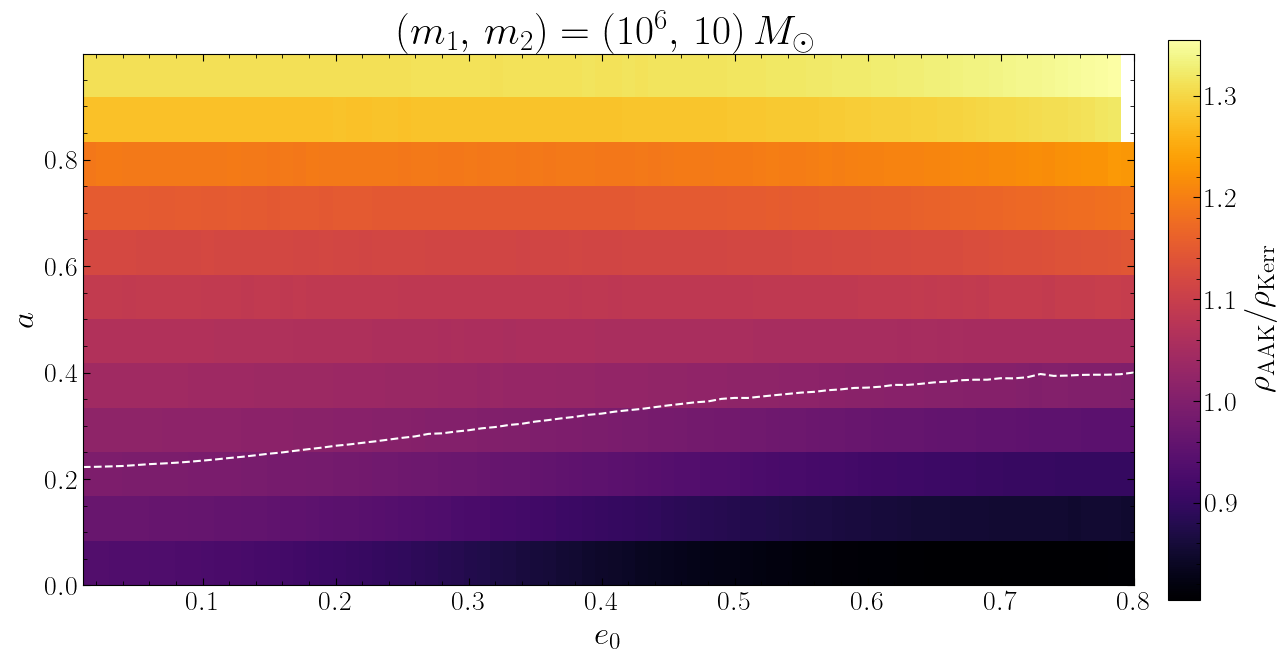

In [6]:
# Convert to arrays
SNR_ratios_array_M1e6_mu1e1 = np.array(SNR_ratios_M1e6_mu1e1)
ordered_spins_array = np.array(ordered_spins)
e0_vec = np.arange(0.01, 0.81, 0.01)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 7))
cax = ax.imshow(
    SNR_ratios_array_M1e6_mu1e1,
    aspect='auto',
    origin='lower',
    extent=[e0_vec[0], e0_vec[-1], ordered_spins_array[0], ordered_spins_array[-1]],
    cmap='inferno',
)

# Axis labels and title
ax.set_xlabel(r'$e_0$', fontsize=24)
ax.set_ylabel(r'$a$', fontsize=24)
#ax.set_title(r'Heatmap of $\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=20)
ax.set_title(r'$(m_1, \, m_2)  = (10^6, \, 10)\, M_\odot$', fontsize=30)


# Add colorbar
#cbar = fig.colorbar(cax, ax=ax, anchor=(0.0, 1.0))
cbar_ax = fig.add_axes([0.99, 0.115, 0.027, 0.8])
cbar = fig.colorbar(cax, ax=ax, pad=0.07, orientation='vertical', 
                    cax=cbar_ax)

cbar.set_label(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=24)

# Optional: Add contour at ratio = 1.0 to separate over/underestimation
# X, Y mesh for contour
E0, SPIN = np.meshgrid(e0_vec, ordered_spins_array)
ax.contour(E0, SPIN, SNR_ratios_array_M1e6_mu1e1, levels=[1.0], colors='white', linewidths=1.5, linestyles='--')

plt.tight_layout()
plt.savefig(SNR_plot_direc + "M1e6_mu1e1_AAK_vs_Kerr_Amp_Heatmap")
plt.show()
plt.close()

In [8]:
import numpy as np
import glob
os.chdir(SNR_data_direc + "M1e7_mu1e2/pure_SNRs/")
file_list = os.listdir()
# # Step 1: Get all relevant filenames
files = glob.glob("*.npy")  # Adjust path as needed

# # Step 2: Extract and sort spin values
# spin_values = sorted(set(float(f.split("_")[-1].replace(".npy", "")) for f in files))

spin_values = np.concatenate([np.round(np.arange(0,1.0,0.1),3),np.array([0.99,0.998])])
# Step 3: Compute SNR ratios
SNR_ratios_M1e7_mu1e2 = []
ordered_spins = []  # To keep track of the order

for spin in spin_values:
    kerr_file = f"SNR_Kerr_vec_{spin}.npy"
    aak_file = f"SNR_AAK_vec_{spin}.npy"
 
    # Ensure both files exist before proceeding
    # print(file_list)
    if kerr_file in file_list or aak_file in file_list:
        SNR_Kerr = np.load(kerr_file)
        SNR_AAK = np.load(aak_file)

        # Compute ratio (avoid division by zero)
        # ratio = SNR_Kerr / np.where(SNR_AAK != 0, SNR_AAK, np.nan)
        ratio = SNR_AAK/SNR_Kerr

        SNR_ratios_M1e7_mu1e2.append(ratio[0:])
        ordered_spins.append(spin)

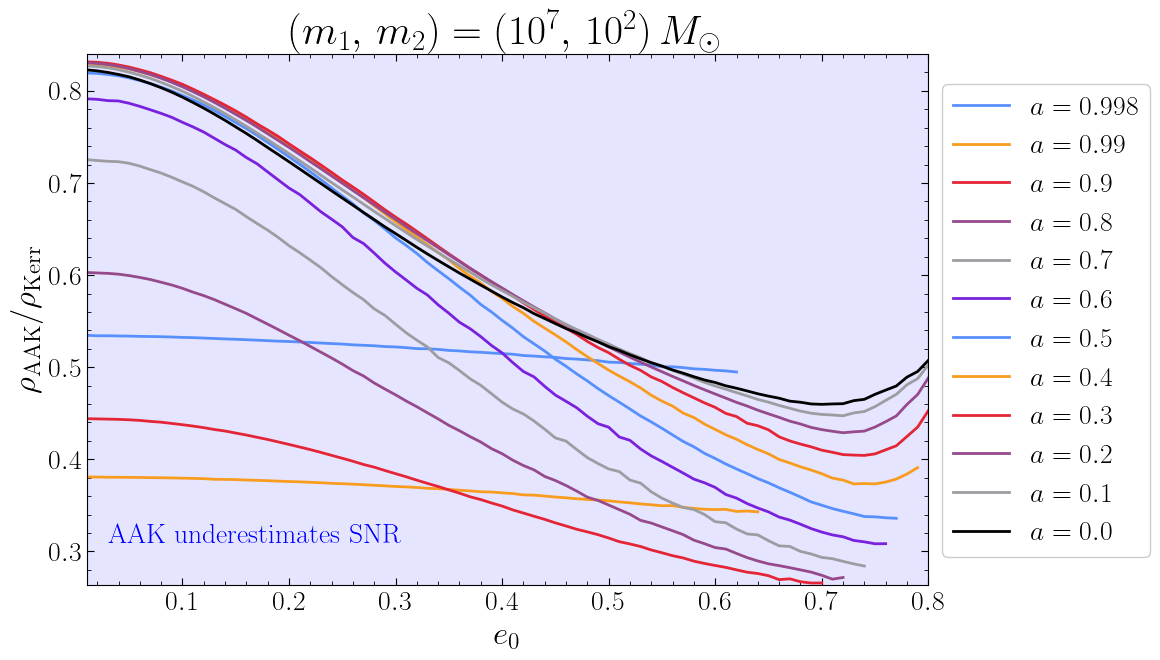

In [9]:
e0_vec = np.arange(0.01,0.81,0.01)
import matplotlib.pyplot as plt
import numpy as np

SNR_ratios = np.asarray(SNR_ratios_M1e7_mu1e2)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Plot all SNR ratios
for j in range(-1 + len(ordered_spins), -1, -1):
    if j == 0:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, c='black', label=rf'$a = {ordered_spins[j]}$', rasterized=True)
    else:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, label=rf'$a = {ordered_spins[j]}$', rasterized=True)
        
    

# Add grid, labels, and title
#ax.grid(True)
ax.set_xlabel(r'$e_0$', fontsize=24)
ax.set_ylabel(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=24)
#ax.set_title(r'AAK vs Kerr Amplitudes', fontsize=30)
ax.set_title(r'$(m_1, \, m_2)  = (10^7, \, 10^2)\, M_\odot$', fontsize=30)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.0, 0.97))

# --- Shaded Regions ---
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=2)  # Horizontal line at y = 1.0

#Shade below y=1 (blue, faded)
nan_mask = ~np.isnan(SNR_ratios)
#ax.fill_between(e0_vec, np.min(np.min(SNR_ratios[nan_mask])), 1.0, color='blue', alpha=0.1)
ax.fill_between(e0_vec, 0, 1.0, color='blue', alpha=0.1)

#Shade above y=1 (red, faded)
#ax.fill_between(e0_vec, 1.0, np.max(np.max(SNR_ratios[nan_mask])), color='red', alpha=0.1)
ax.fill_between(e0_vec, 1.0, 10, color='red', alpha=0.1)

# --- Text Annotations ---
# ax.text(
#     0.77, 0.78, r"AAK overestimates SNR", color='red', 
#     #fontweight='bold',
#      fontsize=20, 
#     horizontalalignment='center', transform=ax.transAxes
# )

ax.text(
    0.2, 0.08, "AAK underestimates SNR", color='blue', 
    #fontweight='bold',
     fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes,
)

# plt.savefig("M1e6_mu1e1_AAK_vs_Kerr_Amp.png",bbox_inches = "tight")
ax.set_xlim(np.min(e0_vec), np.max(e0_vec))
ax.set_ylim(np.min(np.min(SNR_ratios[nan_mask])*0.99), np.max(np.max(SNR_ratios[nan_mask]))*1.01)
plt.tight_layout()
plt.savefig(SNR_plot_direc + "M1e7_mu1e2_AAK_vs_Kerr_Amp")
plt.show()
plt.close()

/tmp/ipykernel_1279831/1802820366.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


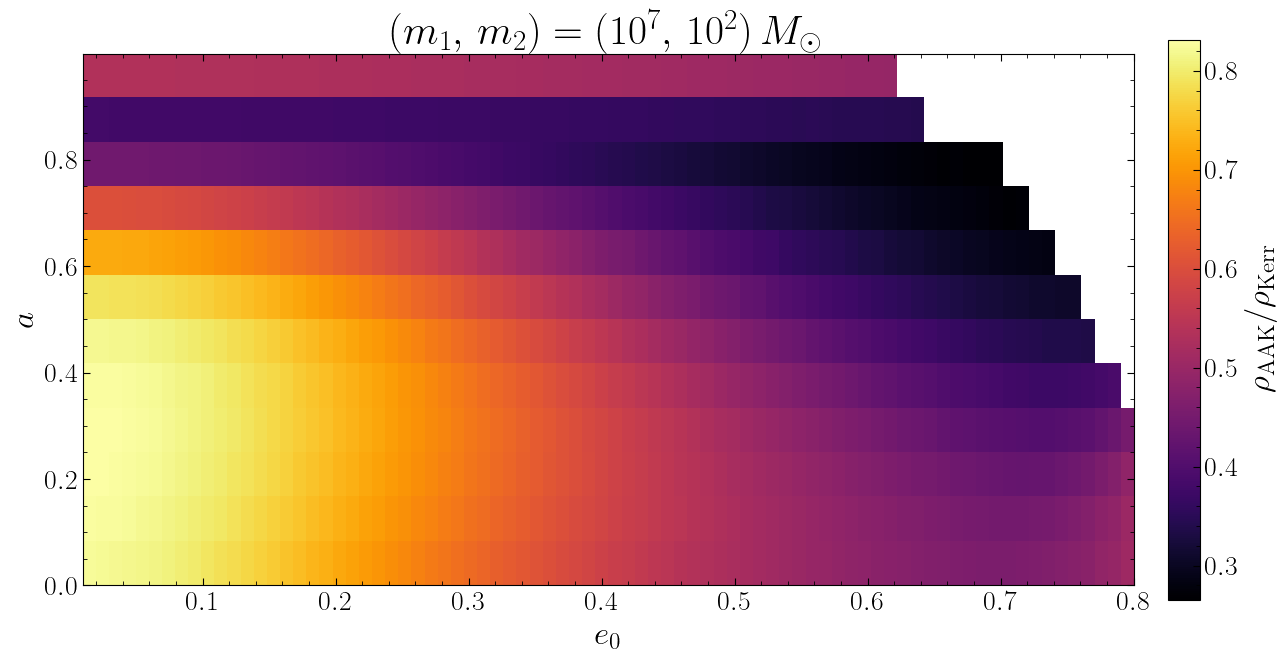

In [10]:
# Convert to arrays
SNR_ratios_array_M1e7_mu1e2 = np.array(SNR_ratios_M1e7_mu1e2)
ordered_spins_array = np.array(ordered_spins)
e0_vec = np.arange(0.01, 0.81, 0.01)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 7))
cax = ax.imshow(
    SNR_ratios_array_M1e7_mu1e2,
    aspect='auto',
    origin='lower',
    extent=[e0_vec[0], e0_vec[-1], ordered_spins_array[0], ordered_spins_array[-1]],
    cmap='inferno',
)

# Axis labels and title
ax.set_xlabel(r'$e_0$', fontsize=24)
ax.set_ylabel(r'$a$', fontsize=24)
#ax.set_title(r'Heatmap of $\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=20)
ax.set_title(r'$(m_1, \, m_2)  = (10^7, \, 10^2)\, M_\odot$', fontsize=30)


# Add colorbar
#cbar = fig.colorbar(cax, ax=ax, anchor=(0.0, 1.0))
cbar_ax = fig.add_axes([0.99, 0.115, 0.027, 0.8])
cbar = fig.colorbar(cax, ax=ax, pad=0.07, orientation='vertical', 
                    cax=cbar_ax)

cbar.set_label(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=24)

# Optional: Add contour at ratio = 1.0 to separate over/underestimation
# X, Y mesh for contour
E0, SPIN = np.meshgrid(e0_vec, ordered_spins_array)
ax.contour(E0, SPIN, SNR_ratios_array_M1e7_mu1e2, levels=[1.0], colors='white', linewidths=1.5, linestyles='--')

plt.tight_layout()
plt.savefig(SNR_plot_direc + "M1e7_mu1e2_AAK_vs_Kerr_Amp_Heatmap")
plt.show()
plt.close()

In [11]:


import numpy as np
import glob

# # Step 1: Get all relevant filenames
files = glob.glob("*.npy")  # Adjust path as needed
file_list = os.chdir(SNR_data_direc + "M1e5_mu1/pure_SNRs/")

# # Step 2: Extract and sort spin values
# spin_values = sorted(set(float(f.split("_")[-1].replace(".npy", "")) for f in files))

spin_values = np.concatenate([np.round(np.arange(0,1.0,0.1),3),np.array([0.99,0.998])])
# Step 3: Compute SNR ratios
SNR_ratios_M1e5_mu1 = []
ordered_spins = []  # To keep track of the order
file_list_M1e5_mu1 = os.listdir()
for spin in spin_values:
    kerr_file = f"SNR_Kerr_vec_{spin}.npy"
    aak_file = f"SNR_AAK_vec_{spin}.npy"
 
    # Ensure both files exist before proceeding
    # print(file_list)
    if kerr_file in files or aak_file in file_list:
        
        SNR_Kerr = np.load(kerr_file)
        SNR_AAK = np.load(aak_file)

        # Compute ratio (avoid division by zero)
        # ratio = SNR_Kerr / np.where(SNR_AAK != 0, SNR_AAK, np.nan)
        ratio = SNR_AAK/SNR_Kerr

        SNR_ratios_M1e5_mu1.append(ratio[0:])
        ordered_spins.append(spin)

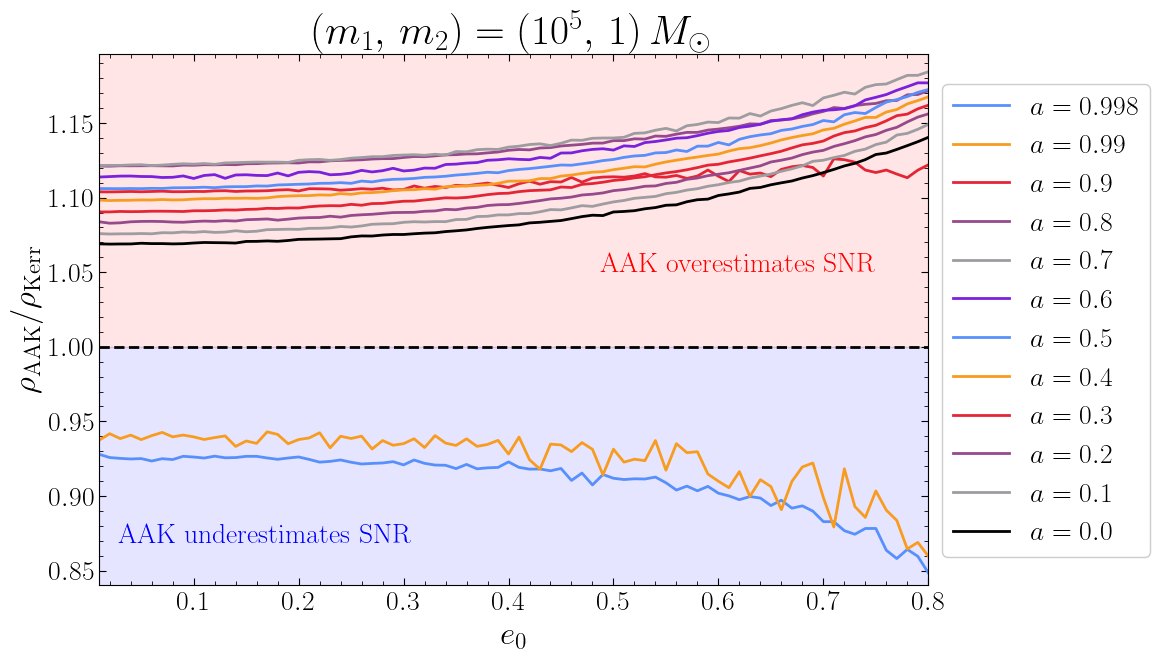

In [12]:
e0_vec = np.arange(0.01,0.81,0.01)
import matplotlib.pyplot as plt
import numpy as np

SNR_ratios = np.asarray(SNR_ratios_M1e5_mu1)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Plot all SNR ratios
for j in range(-1 + len(ordered_spins), -1, -1):
    if j == 0:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, c='black', label=rf'$a = {ordered_spins[j]}$', rasterized=True)
    else:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, label=rf'$a = {ordered_spins[j]}$', rasterized=True)
        
    

# Add grid, labels, and title
#ax.grid(True)
ax.set_xlabel(r'$e_0$', fontsize=24)
ax.set_ylabel(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=24)
#ax.set_title(r'AAK vs Kerr Amplitudes', fontsize=30)
ax.set_title(r'$(m_1, \, m_2)  = (10^5, \, 1)\, M_\odot$', fontsize=30)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.0, 0.97))

# --- Shaded Regions ---
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=2)  # Horizontal line at y = 1.0

#Shade below y=1 (blue, faded)
nan_mask = ~np.isnan(SNR_ratios)
#ax.fill_between(e0_vec, np.min(np.min(SNR_ratios[nan_mask])), 1.0, color='blue', alpha=0.1)
ax.fill_between(e0_vec, 0, 1.0, color='blue', alpha=0.1)

#Shade above y=1 (red, faded)
#ax.fill_between(e0_vec, 1.0, np.max(np.max(SNR_ratios[nan_mask])), color='red', alpha=0.1)
ax.fill_between(e0_vec, 1.0, 10, color='red', alpha=0.1)

# --- Text Annotations ---
ax.text(
    0.77, 0.59, r"AAK overestimates SNR", color='red', 
    #fontweight='bold',
     fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes
)

ax.text(
    0.2, 0.08, "AAK underestimates SNR", color='blue', 
    #fontweight='bold',
     fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes,
)

# plt.savefig("M1e6_mu1e1_AAK_vs_Kerr_Amp.png",bbox_inches = "tight")
ax.set_xlim(np.min(e0_vec), np.max(e0_vec))
ax.set_ylim(np.min(np.min(SNR_ratios[nan_mask])*0.99), np.max(np.max(SNR_ratios[nan_mask]))*1.01)
plt.tight_layout()
plt.savefig(SNR_plot_direc + "M1e5_mu1_AAK_vs_Kerr_Amp")
plt.show()
plt.close()

/tmp/ipykernel_1279831/570349815.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


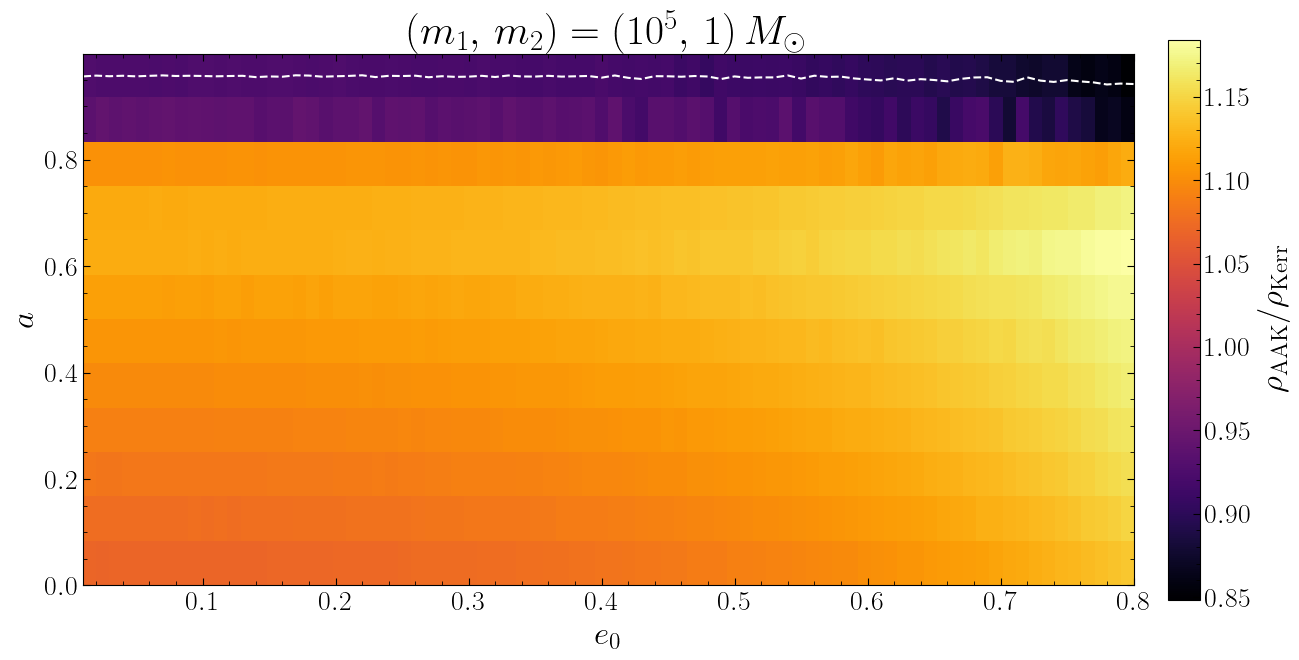

In [13]:
# Convert to arrays
SNR_ratios_array_M1e5_mu1 = np.array(SNR_ratios_M1e5_mu1)
ordered_spins_array = np.array(ordered_spins)
e0_vec = np.arange(0.01, 0.81, 0.01)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 7))
cax = ax.imshow(
    SNR_ratios_array_M1e5_mu1,
    aspect='auto',
    origin='lower',
    extent=[e0_vec[0], e0_vec[-1], ordered_spins_array[0], ordered_spins_array[-1]],
    cmap='inferno',
)

# Axis labels and title
ax.set_xlabel(r'$e_0$', fontsize=24)
ax.set_ylabel(r'$a$', fontsize=24)
#ax.set_title(r'Heatmap of $\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=20)
ax.set_title(r'$(m_1, \, m_2)  = (10^5, \, 1)\, M_\odot$', fontsize=30)


# Add colorbar
#cbar = fig.colorbar(cax, ax=ax, anchor=(0.0, 1.0))
cbar_ax = fig.add_axes([0.99, 0.115, 0.027, 0.8])
cbar = fig.colorbar(cax, ax=ax, pad=0.07, orientation='vertical', 
                    cax=cbar_ax)

cbar.set_label(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=24)

# Optional: Add contour at ratio = 1.0 to separate over/underestimation
# X, Y mesh for contour
E0, SPIN = np.meshgrid(e0_vec, ordered_spins_array)
ax.contour(E0, SPIN, SNR_ratios_array_M1e5_mu1, levels=[1.0], colors='white', linewidths=1.5, linestyles='--')

plt.tight_layout()
plt.savefig(SNR_plot_direc + "M1e5_mu1_AAK_vs_Kerr_Amp_Heatmap")
plt.show()
plt.close()

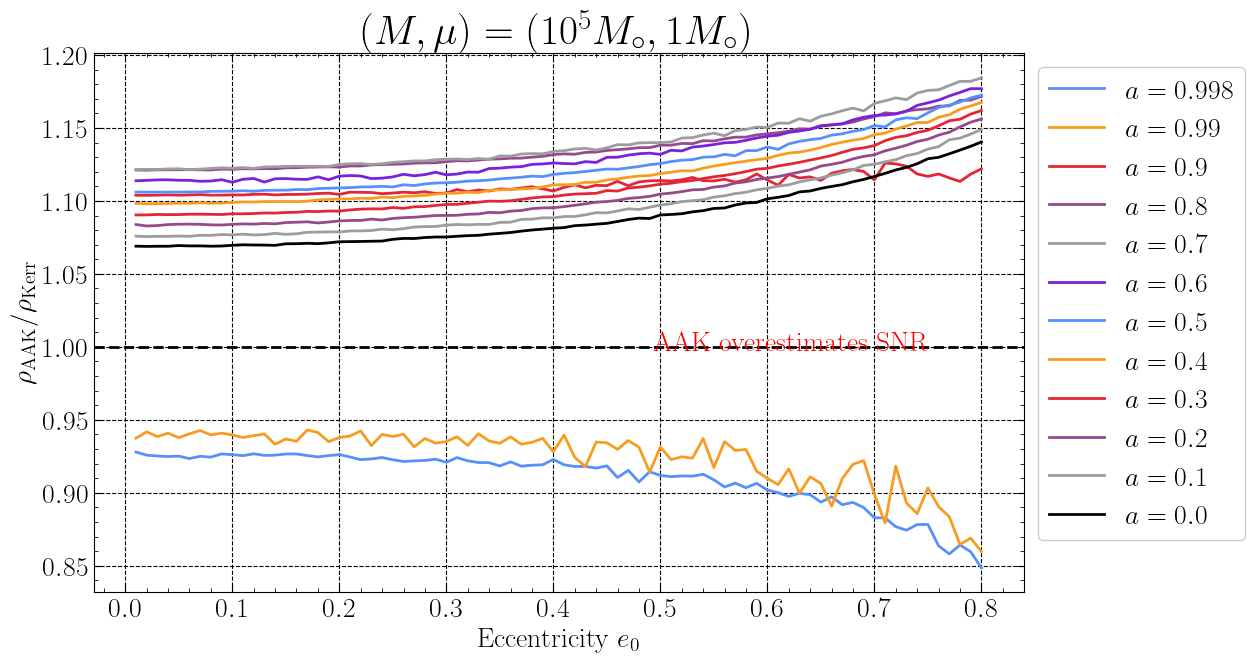

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Plot all SNR ratios
for j in range(-1 + len(ordered_spins), -1, -1):
    if j == 0:
        ax.plot(e0_vec, SNR_ratios_M1e5_mu1[j], ms=20, c='black', label=rf'$a = {ordered_spins[j]}$')
    else:
        ax.plot(e0_vec, SNR_ratios_M1e5_mu1[j], ms=20, label=rf'$a = {ordered_spins[j]}$')
        
    

# Add grid, labels, and title
ax.grid(True)
ax.set_xlabel(r'Eccentricity $e_0$', fontsize=20)
ax.set_ylabel(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=20)
ax.set_title(r'$(M, \mu) = (10^5M_\circ, 1M_\circ)$', fontsize=30)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.0, 1.0))

# --- Shaded Regions ---
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=2)  # Horizontal line at y = 1.0

# Shade below y=1 (blue, faded)
# ax.fill_between(e0_vec, np.min([np.min(arr) for arr in SNR_ratios]), 1.0, color='blue', alpha=0.2)

# Shade above y=1 (red, faded)
# ax.fill_between(e0_vec, 1.0, np.max([np.max(arr) for arr in SNR_ratios]), color='red', alpha=0.2)

# --- Text Annotations ---
ax.text(
    0.75, 0.45, r"AAK overestimates SNR", color='red', fontweight='bold', fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes
)
# ax.text(
#     0.3, 0.1, "AAK underestimates SNR", color='blue', fontweight='bold', fontsize=20, 
#     horizontalalignment='center', transform=ax.transAxes,
# )
# plt.savefig("M1e7_mu1e2_AAK_vs_Kerr_Amp.png",bbox_inches = "tight")
plt.show()


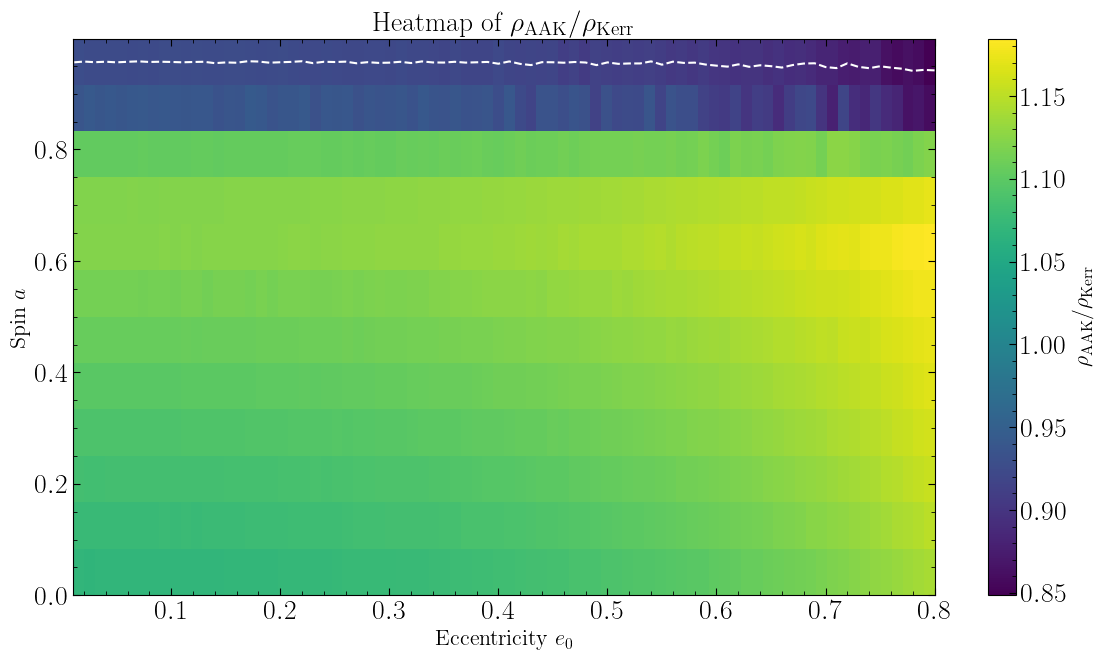

In [15]:
# Convert to arrays
SNR_ratios_array_M1e5_mu1 = np.array(SNR_ratios)
ordered_spins_array = np.array(ordered_spins)
e0_vec = np.arange(0.01, 0.81, 0.01)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 7))
cax = ax.imshow(
    SNR_ratios_array_M1e5_mu1,
    aspect='auto',
    origin='lower',
    extent=[e0_vec[0], e0_vec[-1], ordered_spins_array[0], ordered_spins_array[-1]],
    cmap='viridis'
)

# Axis labels and title
ax.set_xlabel(r'Eccentricity $e_0$', fontsize=16)
ax.set_ylabel(r'Spin $a$', fontsize=16)
ax.set_title(r'Heatmap of $\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=20)

# Add colorbar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label(r'$\rho_{\rm AAK}/\rho_{\rm Kerr}$', fontsize=16)

# Optional: Add contour at ratio = 1.0 to separate over/underestimation
# X, Y mesh for contour
E0, SPIN = np.meshgrid(e0_vec, ordered_spins_array)
ax.contour(E0, SPIN, SNR_ratios_array_M1e5_mu1, levels=[1.0], colors='white', linewidths=1.5, linestyles='--')

plt.tight_layout()
plt.show()

In [53]:
SNR_ratios_array_M1e5_mu1 - SNR_ratios_array_M1e7_mu1e2

array([[0.24619214, 0.24706878, 0.2488763 , 0.25109881, 0.25412739,
        0.25737993, 0.26130624, 0.26553725, 0.27049548, 0.27636743,
        0.28258464, 0.28854457, 0.29497609, 0.30150474, 0.30973993,
        0.3169131 , 0.32467006, 0.33223917, 0.34041457, 0.34892317,
        0.35684909, 0.36485241, 0.37290233, 0.38099549, 0.38999301,
        0.39845598, 0.40624473, 0.41463564, 0.42288513, 0.43015273,
        0.43811834, 0.44603001, 0.45351708, 0.4613668 , 0.46872493,
        0.4761397 , 0.4836179 , 0.49091376, 0.49793574, 0.50501601,
        0.51154022, 0.51844047, 0.52526872, 0.53123543, 0.53728501,
        0.54392617, 0.54984148, 0.5559298 , 0.56040158, 0.56801686,
        0.57244382, 0.57780017, 0.58338905, 0.58841006, 0.59359344,
        0.59808602, 0.6037018 , 0.60888197, 0.61284021, 0.61798781,
        0.62267097, 0.62652018, 0.63194832, 0.6356489 , 0.63996705,
        0.64354961, 0.64796934, 0.65113787, 0.65462062, 0.65704089,
        0.65876344, 0.66084277, 0.65928878, 0.66